## Лабораторная работа No4. Выделение признаков символов
### Вариант №3 .

Сгенерировать изображения символов в прямоугольниках одинакового размера: примерно 50*50 пикселей. 

Шрифт Times New Roman, кегль 52 (параметр).

In [1]:
from PIL import Image, ImageDraw, ImageFont
import PIL.ImageOps
import numpy as np
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

Сохранить в папку по принципу "1 символ - 1 файл". Алфавиты на выбор: ABCDEFGHIJKLMNOPQRSTUVWXYZ

In [17]:
def to_inverted_grayscale(image):
    new_img = image.convert('L')
    new_img = PIL.ImageOps.invert(new_img)
    arr=np.asarray(new_img)
    return new_img

In [23]:
%%time
alphabeth = list("ABCDEFGHIJKLMNOPQRSTUVWXYZ")
font = ImageFont.truetype("9041.ttf", 52)
for letter in alphabeth:
    img = Image.new("L", (50, 50), (0))
    draw = ImageDraw.Draw(img)
    w,h=font.getsize(letter)
    shift=12
    if letter == "I" or letter == "J":
        shift=20
    if letter == "W":
        shift=5    
    draw.text((0+shift, 0), letter, (255), font=font)
    img= to_inverted_grayscale(img)
    img.save('pictures/alphabeth2/'+letter+'.bmp')

CPU times: user 18 ms, sys: 8.48 ms, total: 26.5 ms
Wall time: 46.5 ms


In [16]:
for i in alphabeth:
    print('![title](pictures/alphabeth/'+i+'.bmp)')

![title](pictures/alphabeth/A.bmp)
![title](pictures/alphabeth/B.bmp)
![title](pictures/alphabeth/C.bmp)
![title](pictures/alphabeth/D.bmp)
![title](pictures/alphabeth/E.bmp)
![title](pictures/alphabeth/F.bmp)
![title](pictures/alphabeth/G.bmp)
![title](pictures/alphabeth/H.bmp)
![title](pictures/alphabeth/I.bmp)
![title](pictures/alphabeth/J.bmp)
![title](pictures/alphabeth/K.bmp)
![title](pictures/alphabeth/L.bmp)
![title](pictures/alphabeth/M.bmp)
![title](pictures/alphabeth/N.bmp)
![title](pictures/alphabeth/O.bmp)
![title](pictures/alphabeth/P.bmp)
![title](pictures/alphabeth/Q.bmp)
![title](pictures/alphabeth/R.bmp)
![title](pictures/alphabeth/S.bmp)
![title](pictures/alphabeth/T.bmp)
![title](pictures/alphabeth/U.bmp)
![title](pictures/alphabeth/V.bmp)
![title](pictures/alphabeth/W.bmp)
![title](pictures/alphabeth/X.bmp)
![title](pictures/alphabeth/Y.bmp)
![title](pictures/alphabeth/Z.bmp)


![title](pictures/alphabeth/A.bmp)
![title](pictures/alphabeth/B.bmp)
![title](pictures/alphabeth/C.bmp)
![title](pictures/alphabeth/D.bmp)
![title](pictures/alphabeth/E.bmp)
![title](pictures/alphabeth/F.bmp)
![title](pictures/alphabeth/G.bmp)
![title](pictures/alphabeth/H.bmp)
...

### Для всех изображений рассчитать набор признаков. 
#### Признаки:


a) Вес (масса чёрного); 

$weight = \sum_{x}\sum_{y} f(x,y) $

In [4]:
def get_black_weight(img):
    pix = np.asarray(img)
    return np.sum(pix)/255

b) Удельный вес (вес, нормированный к площади);

$weight_{rel}=\frac{\sum_{x} \sum_{y} f(x,y) }{S}$

In [5]:
def get_normal_black_weight(img):
    s = img.size[0] * img.size[1]
    return get_black_weight(img)/s

c) Координаты центра тяжести;

In [6]:
def get_weight_center(img):
    black_w = get_black_weight(img)
    x_coords = get_moment(1,0,img)/black_w
    y_coords = get_moment(0,1,img)/black_w
    return (x_coords,y_coords)

d) Нормированные координаты центра тяжести;

In [7]:
def get_normal_weight_center(img,x_coords,y_coords):
    width = img.size[0]
    height = img.size[1]
    x_coords_norm = (x_coords-1)/(width-1)
    y_coords_norm = (y_coords - 1) / (height - 1)
    return (x_coords_norm,y_coords_norm)

e) Осевые моменты инерции по горизонтали и вертикали;

In [8]:
def get_moment(p,q,img, x_av=0, y_av=0):
    width=img.size[0]
    height = img.size[1]
    moment=0
    pix = np.asarray(img)
    for x in range(width):
        for y in range(height):
            moment += math.pow(x-x_av,p)*math.pow(y-y_av,q)*pix[x][y]
    return moment/255

In [9]:
def get_inert_axis(img,x_center,y_center):
    x_axis = get_moment(0,2,img,x_av=0,y_av=y_center)
    y_axis = get_moment(2,0,img,x_av=x_center,y_av=0)
    return (x_axis,y_axis)

f) Нормированные осевые моменты инерции.

In [10]:
def get_normal_inert_axis(x_axis,y_axis,img):
    width = img.size[0]
    height = img.size[1]
    norm=math.pow(width,2)+math.pow(height,2)
    return (x_axis/norm,y_axis/norm)

In [24]:
%%time
alphabeth = list("ABCDEFGHIJKLMNOPQRSTUVWXYZ")
data=[]
f='.3f'
for letter in alphabeth:
    path_to_img = "pictures/alphabeth2/"+letter+".bmp"
    image = Image.open(path_to_img).convert("L")
    row = [letter]
    row.append(format(get_black_weight(image),f))
    row.append(format(get_normal_black_weight(image),f))
    (x,y) = get_weight_center(image)
    row.append(format(x,f))
    row.append(format(y,f))
    (x_norm,y_norm) =get_normal_weight_center(image, x, y)
    row.append(format(x_norm,f))
    row.append(format(y_norm,f))
    (x_ax,y_ax) = get_inert_axis(image, x, y)
    row.append(format(x_ax,f))
    row.append(format(y_ax,f))
    (x_norm_ax, y_norm_ax) = get_normal_inert_axis(x_ax,y_ax,image)
    row.append(format(x_norm_ax,f))
    row.append(format(y_norm_ax,f))
    data.append(row)

CPU times: user 841 ms, sys: 6.98 ms, total: 848 ms
Wall time: 868 ms


In [25]:
head = ["letter","black weight","normal black weight","weight center x","weight center y",
        "normal weight center x","normal weight center y",
        "inert axis x","inert axis y","normal inert axis x","normal inert axis y"]

In [26]:
data=pd.DataFrame(data, columns=head)

Сохранить результат в текстовый файл формата *.csv (таблица, где значения в
строках разделены точкой с запятой).

In [27]:
data.to_csv('letters4.csv',index=False,sep=';')

In [16]:
x = data.drop(['letter'],axis=1)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data_to_vis = pd.DataFrame(x_scaled,columns=["black weight","normal black weight","weight center x","weight center y",
        "normal weight center x","normal weight center y",
        "inert axis x","inert axis y","normal inert axis x","normal inert axis y"])

In [17]:
data_to_vis

,black weight,normal black weight,weight center x,weight center y,normal weight center x,normal weight center y,inert axis x,inert axis y,normal inert axis x,normal inert axis y
0,0.676228,0.675926,0.198656,0.359571,0.227273,0.382353,0.625673,0.526279,0.625673,0.526197
1,0.088216,0.092593,0.116123,0.358974,0.136364,0.352941,0.504898,0.124412,0.504882,0.124342
2,0.717747,0.722222,0.709213,0.884317,0.727273,0.882353,0.764620,0.648135,0.764614,0.648032
3,0.165712,0.166667,0.233205,0.193202,0.227273,0.205882,0.238298,0.173868,0.238328,0.173853
4,0.525910,0.527778,0.458733,0.815146,0.454545,0.823529,0.820106,0.395696,0.820128,0.395588
5,0.708351,0.712963,0.856046,0.986285,0.863636,1.000000,0.910698,0.853811,0.910690,0.853723
6,0.345467,0.351852,0.169866,0.395349,0.181818,0.411765,0.369321,0.203357,0.369320,0.203309
7,0.155162,0.157407,0.207294,0.197973,0.227273,0.205882,0.276421,0.190820,0.276443,0.190775
8,1.000000,1.000000,0.777351,0.703041,0.772727,0.705882,1.000000,0.966792,1.000000,0.966784
9,0.964187,0.962963,0.699616,0.565295,0.681818,0.588235,0.912672,0.877361,0.912692,0.877288


/Users/alexanderrogachev/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:88: UserWarning: The handle <matplotlib.patches.Patch object at 0x1a27dbe550> has a label of '_nolegend_' which cannot be automatically added to the legend.
  **kwargs)


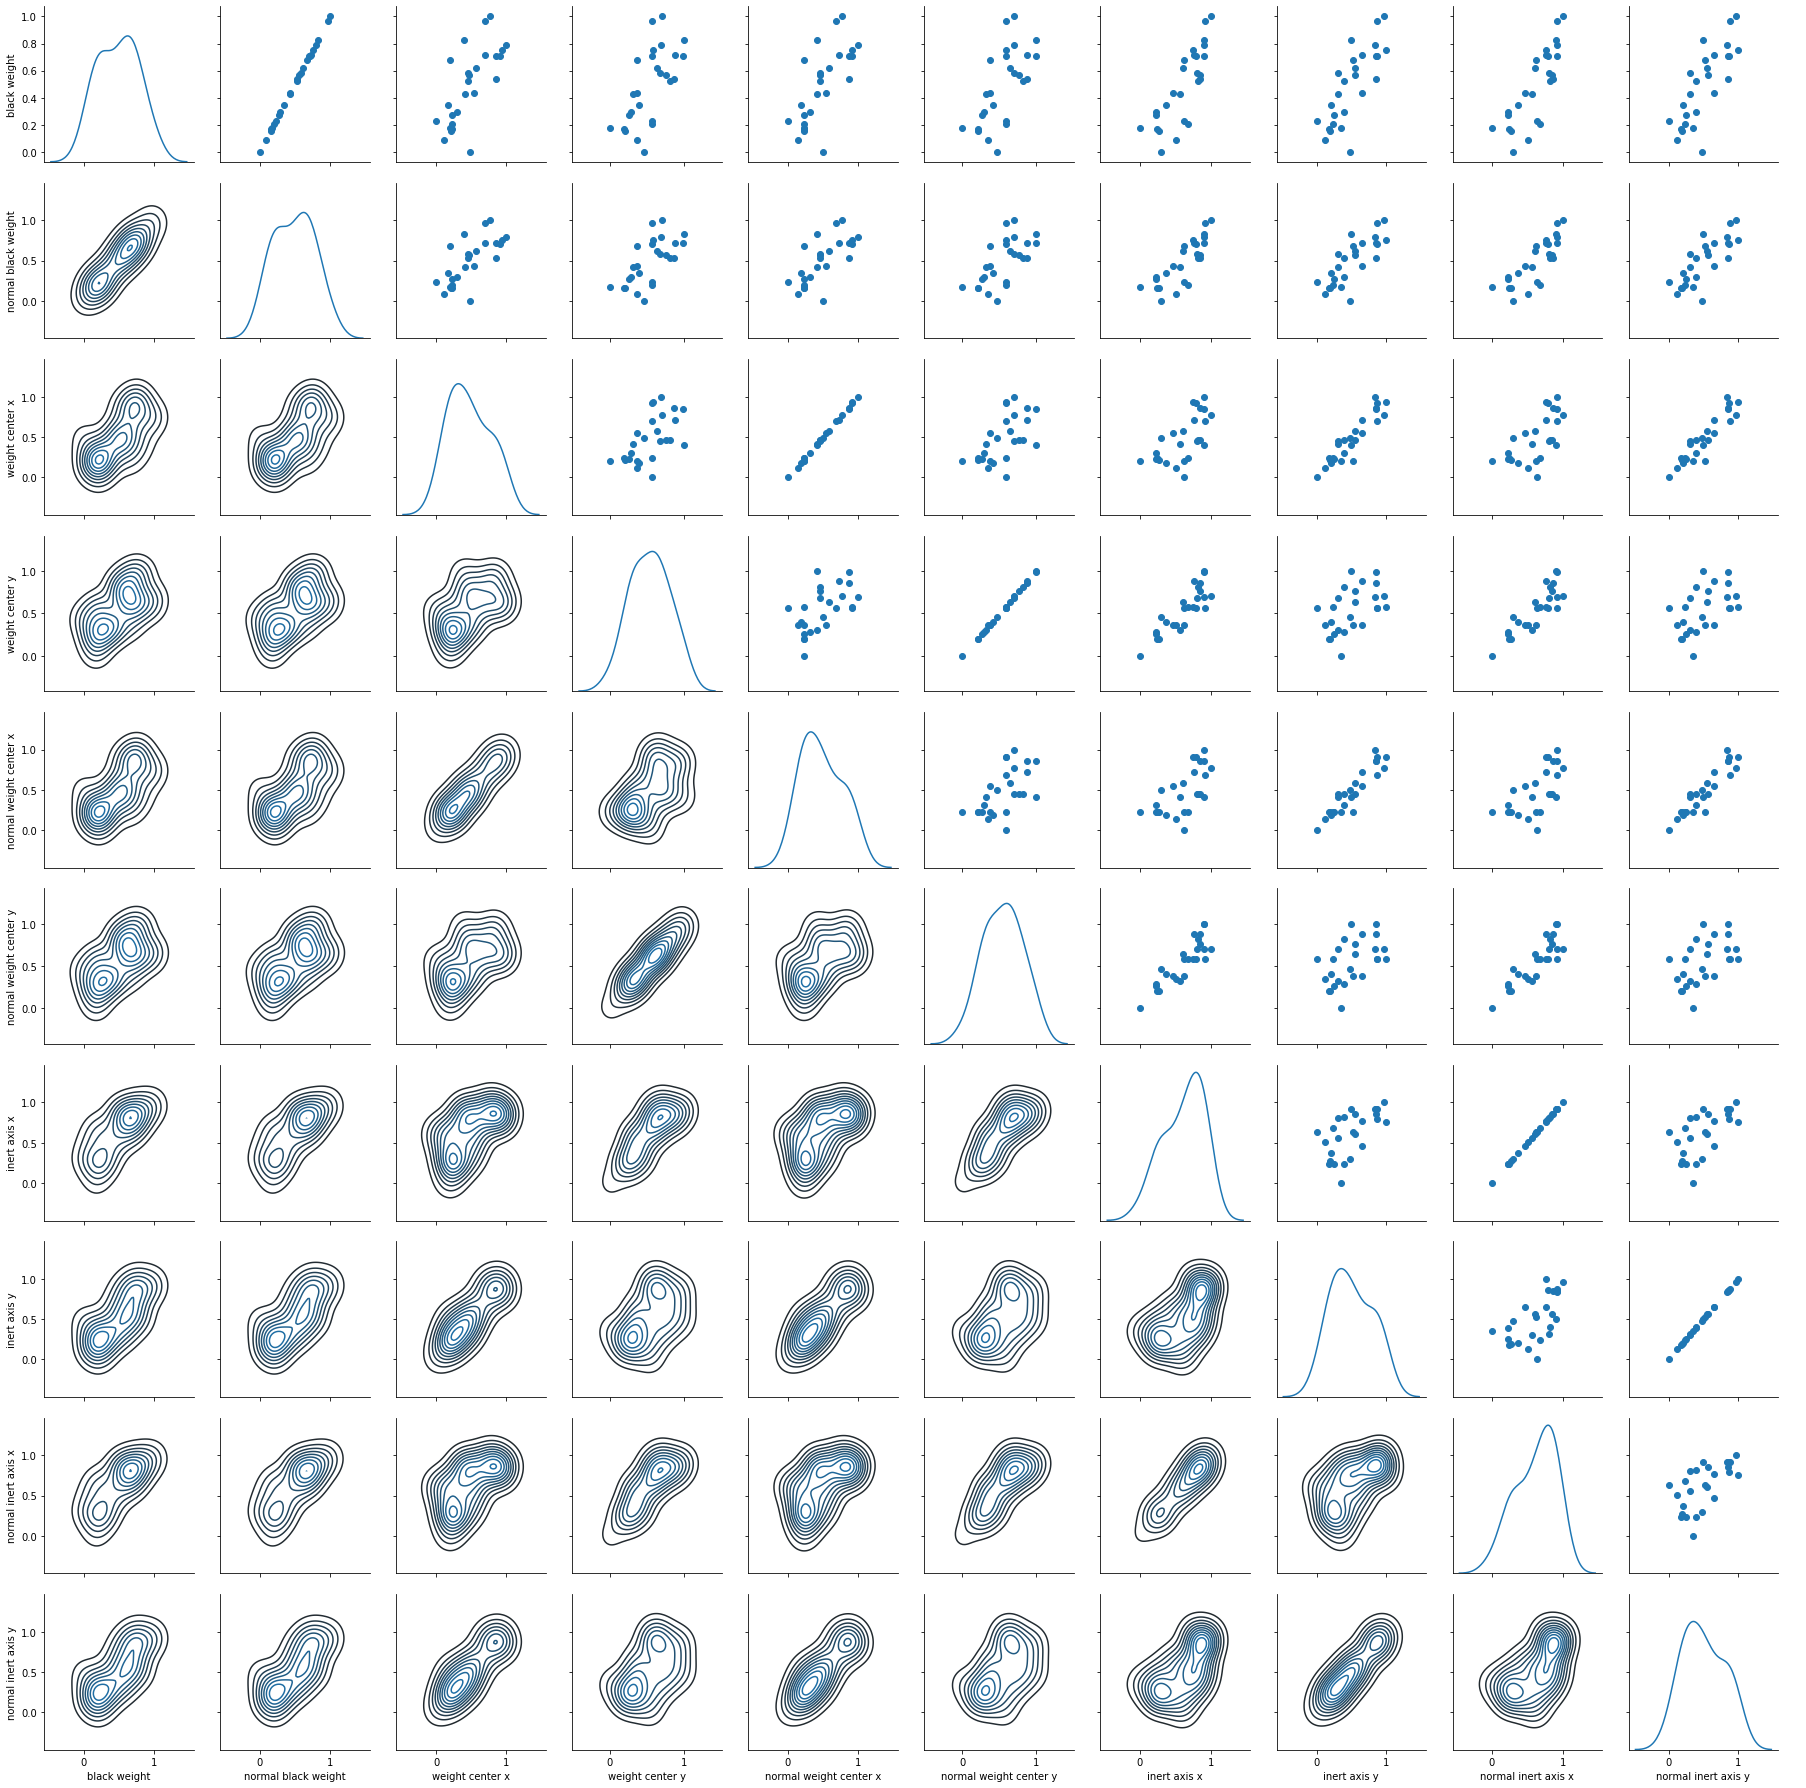

In [18]:
g=sns.PairGrid(data_to_vis)
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot)
g = g.map_diag(sns.kdeplot)
g = g.add_legend()

In [23]:
data_to_vis.corr()

,black weight,normal black weight,weight center x,weight center y,normal weight center x,normal weight center y,inert axis x,inert axis y,normal inert axis x,normal inert axis y
black weight,1.000000,0.999952,0.714276,0.644742,0.712399,0.648186,0.813845,0.789856,0.813854,0.789846
normal black weight,0.999952,1.000000,0.713827,0.645755,0.712079,0.649169,0.814042,0.788910,0.814051,0.788900
weight center x,0.714276,0.713827,1.000000,0.575002,0.998905,0.579629,0.643916,0.929213,0.643934,0.929219
weight center y,0.644742,0.645755,0.575002,1.000000,0.575002,0.999444,0.871981,0.506893,0.871977,0.506895
normal weight center x,0.712399,0.712079,0.998905,0.575002,1.000000,0.579152,0.634598,0.930332,0.634615,0.930336
normal weight center y,0.648186,0.649169,0.579629,0.999444,0.579152,1.000000,0.877068,0.510365,0.877065,0.510369
inert axis x,0.813845,0.814042,0.643916,0.871981,0.634598,0.877068,1.000000,0.620957,1.000000,0.620966
inert axis y,0.789856,0.788910,0.929213,0.506893,0.930332,0.510365,0.620957,1.000000,0.620976,1.000000
normal inert axis x,0.813854,0.814051,0.643934,0.871977,0.634615,0.877065,1.000000,0.620976,1.000000,0.620985
normal inert axis y,0.789846,0.788900,0.929219,0.506895,0.930336,0.510369,0.620966,1.000000,0.620985,1.000000


In [26]:
data

,letter,black weight,normal black weight,weight center x,weight center y,normal weight center x,normal weight center y,inert axis x,inert axis y,normal inert axis x,normal inert axis y
0,A,2217.710,0.887,23.474,23.614,0.459,0.462,486935.374,474226.106,97.387,94.845
1,B,2059.643,0.824,23.388,23.613,0.457,0.461,477286.863,458195.681,95.457,91.639
2,C,2228.871,0.892,24.006,24.494,0.470,0.479,498035.563,479086.945,99.607,95.817
3,D,2080.475,0.832,23.510,23.335,0.459,0.456,455988.582,460168.478,91.198,92.034
4,E,2177.302,0.871,23.745,24.378,0.464,0.477,502468.220,469017.196,100.494,93.803
5,F,2226.345,0.891,24.159,24.665,0.473,0.483,509705.484,487291.329,101.941,97.458
6,G,2128.796,0.852,23.444,23.674,0.458,0.463,466455.768,461344.809,93.291,92.269
7,H,2077.639,0.831,23.483,23.343,0.459,0.456,459034.202,460844.705,91.807,92.169
8,I,2304.745,0.922,24.077,24.190,0.471,0.473,516839.684,491798.141,103.368,98.360
9,J,2295.118,0.918,23.996,23.959,0.469,0.469,509863.179,488230.737,101.973,97.646


In [27]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel


In [28]:
X= data.iloc[:,1:]
y=data['letter']



In [34]:
clf = ExtraTreesClassifier(n_estimators=100)
clf = clf.fit(X, y)

In [35]:
for i in zip(data.columns,clf.feature_importances_):
    print(i)



('letter', 0.10239999999999998)
('black weight', 0.09839999999999999)
('normal black weight', 0.09640000000000001)
('weight center x', 0.10479999999999996)
('weight center y', 0.09240000000000005)
('normal weight center x', 0.09160000000000003)
('normal weight center y', 0.10200000000000004)
('inert axis x', 0.10120000000000003)
('inert axis y', 0.11279999999999997)
('normal inert axis x', 0.098)


In [36]:
from catboost import CatBoostClassifier

In [40]:
cb=CatBoostClassifier(n_estimators=1000)

In [41]:
cb.fit(X,y)

0:	learn: 3.2500640	total: 20.1ms	remaining: 20s
1:	learn: 3.2419339	total: 40.3ms	remaining: 20.1s
2:	learn: 3.2343816	total: 51.6ms	remaining: 17.1s
3:	learn: 3.2262116	total: 70.7ms	remaining: 17.6s
4:	learn: 3.2192592	total: 87.1ms	remaining: 17.3s
5:	learn: 3.2119068	total: 106ms	remaining: 17.5s
6:	learn: 3.2040258	total: 123ms	remaining: 17.5s
7:	learn: 3.1960881	total: 141ms	remaining: 17.5s
8:	learn: 3.1885447	total: 161ms	remaining: 17.7s
9:	learn: 3.1806687	total: 178ms	remaining: 17.6s
10:	learn: 3.1726352	total: 196ms	remaining: 17.6s
11:	learn: 3.1655003	total: 214ms	remaining: 17.6s
12:	learn: 3.1571700	total: 232ms	remaining: 17.6s
13:	learn: 3.1486987	total: 254ms	remaining: 17.9s
14:	learn: 3.1430656	total: 262ms	remaining: 17.2s
15:	learn: 3.1360566	total: 277ms	remaining: 17s
16:	learn: 3.1306058	total: 284ms	remaining: 16.4s
17:	learn: 3.1238233	total: 294ms	remaining: 16s
18:	learn: 3.1156955	total: 311ms	remaining: 16.1s
19:	learn: 3.1078140	total: 330ms	remainin

166:	learn: 2.0881102	total: 2.94s	remaining: 14.6s
167:	learn: 2.0814069	total: 2.96s	remaining: 14.7s
168:	learn: 2.0748939	total: 2.98s	remaining: 14.6s
169:	learn: 2.0687182	total: 3s	remaining: 14.6s
170:	learn: 2.0623973	total: 3.01s	remaining: 14.6s
171:	learn: 2.0564045	total: 3.03s	remaining: 14.6s
172:	learn: 2.0505663	total: 3.04s	remaining: 14.5s
173:	learn: 2.0446279	total: 3.06s	remaining: 14.5s
174:	learn: 2.0383145	total: 3.08s	remaining: 14.5s
175:	learn: 2.0322374	total: 3.1s	remaining: 14.5s
176:	learn: 2.0258533	total: 3.12s	remaining: 14.5s
177:	learn: 2.0196564	total: 3.13s	remaining: 14.5s
178:	learn: 2.0132356	total: 3.15s	remaining: 14.5s
179:	learn: 2.0083045	total: 3.16s	remaining: 14.4s
180:	learn: 2.0021319	total: 3.18s	remaining: 14.4s
181:	learn: 1.9961409	total: 3.19s	remaining: 14.4s
182:	learn: 1.9900140	total: 3.21s	remaining: 14.3s
183:	learn: 1.9840539	total: 3.23s	remaining: 14.3s
184:	learn: 1.9794355	total: 3.24s	remaining: 14.3s
185:	learn: 1.97

333:	learn: 1.1967739	total: 6.27s	remaining: 12.5s
334:	learn: 1.1926884	total: 6.29s	remaining: 12.5s
335:	learn: 1.1885161	total: 6.31s	remaining: 12.5s
336:	learn: 1.1844801	total: 6.33s	remaining: 12.4s
337:	learn: 1.1804935	total: 6.35s	remaining: 12.4s
338:	learn: 1.1763550	total: 6.37s	remaining: 12.4s
339:	learn: 1.1722015	total: 6.39s	remaining: 12.4s
340:	learn: 1.1680977	total: 6.41s	remaining: 12.4s
341:	learn: 1.1641918	total: 6.43s	remaining: 12.4s
342:	learn: 1.1603098	total: 6.45s	remaining: 12.4s
343:	learn: 1.1562730	total: 6.47s	remaining: 12.3s
344:	learn: 1.1522390	total: 6.49s	remaining: 12.3s
345:	learn: 1.1483986	total: 6.52s	remaining: 12.3s
346:	learn: 1.1443803	total: 6.54s	remaining: 12.3s
347:	learn: 1.1403769	total: 6.56s	remaining: 12.3s
348:	learn: 1.1365051	total: 6.58s	remaining: 12.3s
349:	learn: 1.1326559	total: 6.6s	remaining: 12.3s
350:	learn: 1.1286638	total: 6.62s	remaining: 12.2s
351:	learn: 1.1248315	total: 6.64s	remaining: 12.2s
352:	learn: 1

492:	learn: 0.7110433	total: 9.66s	remaining: 9.94s
493:	learn: 0.7088699	total: 9.68s	remaining: 9.92s
494:	learn: 0.7067033	total: 9.71s	remaining: 9.9s
495:	learn: 0.7045382	total: 9.73s	remaining: 9.88s
496:	learn: 0.7023269	total: 9.77s	remaining: 9.89s
497:	learn: 0.7003101	total: 9.8s	remaining: 9.88s
498:	learn: 0.6982226	total: 9.83s	remaining: 9.87s
499:	learn: 0.6960689	total: 9.86s	remaining: 9.86s
500:	learn: 0.6938814	total: 9.88s	remaining: 9.85s
501:	learn: 0.6917732	total: 9.91s	remaining: 9.83s
502:	learn: 0.6896948	total: 9.94s	remaining: 9.82s
503:	learn: 0.6876821	total: 9.97s	remaining: 9.81s
504:	learn: 0.6856470	total: 10s	remaining: 9.81s
505:	learn: 0.6835478	total: 10s	remaining: 9.8s
506:	learn: 0.6814979	total: 10.1s	remaining: 9.78s
507:	learn: 0.6795790	total: 10.1s	remaining: 9.77s
508:	learn: 0.6775959	total: 10.1s	remaining: 9.75s
509:	learn: 0.6756415	total: 10.1s	remaining: 9.74s
510:	learn: 0.6735794	total: 10.2s	remaining: 9.72s
511:	learn: 0.67150

652:	learn: 0.4579483	total: 13s	remaining: 6.91s
653:	learn: 0.4568250	total: 13s	remaining: 6.89s
654:	learn: 0.4557198	total: 13s	remaining: 6.87s
655:	learn: 0.4545957	total: 13.1s	remaining: 6.85s
656:	learn: 0.4534562	total: 13.1s	remaining: 6.83s
657:	learn: 0.4523038	total: 13.1s	remaining: 6.81s
658:	learn: 0.4512267	total: 13.1s	remaining: 6.79s
659:	learn: 0.4501476	total: 13.1s	remaining: 6.77s
660:	learn: 0.4490202	total: 13.2s	remaining: 6.75s
661:	learn: 0.4478705	total: 13.2s	remaining: 6.72s
662:	learn: 0.4467785	total: 13.2s	remaining: 6.7s
663:	learn: 0.4457190	total: 13.2s	remaining: 6.68s
664:	learn: 0.4446440	total: 13.2s	remaining: 6.66s
665:	learn: 0.4435304	total: 13.2s	remaining: 6.64s
666:	learn: 0.4425092	total: 13.3s	remaining: 6.62s
667:	learn: 0.4414315	total: 13.3s	remaining: 6.6s
668:	learn: 0.4404004	total: 13.3s	remaining: 6.58s
669:	learn: 0.4393142	total: 13.3s	remaining: 6.56s
670:	learn: 0.4382620	total: 13.3s	remaining: 6.54s
671:	learn: 0.437239

814:	learn: 0.3207422	total: 15.9s	remaining: 3.62s
815:	learn: 0.3201102	total: 16s	remaining: 3.6s
816:	learn: 0.3195059	total: 16s	remaining: 3.58s
817:	learn: 0.3188664	total: 16s	remaining: 3.56s
818:	learn: 0.3182474	total: 16s	remaining: 3.54s
819:	learn: 0.3176110	total: 16s	remaining: 3.52s
820:	learn: 0.3169741	total: 16s	remaining: 3.5s
821:	learn: 0.3164018	total: 16.1s	remaining: 3.48s
822:	learn: 0.3157958	total: 16.1s	remaining: 3.46s
823:	learn: 0.3151858	total: 16.1s	remaining: 3.44s
824:	learn: 0.3145729	total: 16.1s	remaining: 3.42s
825:	learn: 0.3139559	total: 16.1s	remaining: 3.4s
826:	learn: 0.3133682	total: 16.2s	remaining: 3.38s
827:	learn: 0.3127851	total: 16.2s	remaining: 3.36s
828:	learn: 0.3121567	total: 16.2s	remaining: 3.34s
829:	learn: 0.3115582	total: 16.2s	remaining: 3.32s
830:	learn: 0.3109721	total: 16.2s	remaining: 3.3s
831:	learn: 0.3103669	total: 16.2s	remaining: 3.28s
832:	learn: 0.3097405	total: 16.3s	remaining: 3.26s
833:	learn: 0.3091627	total:

974:	learn: 0.2413223	total: 18.8s	remaining: 483ms
975:	learn: 0.2409238	total: 18.9s	remaining: 464ms
976:	learn: 0.2405191	total: 18.9s	remaining: 445ms
977:	learn: 0.2401366	total: 18.9s	remaining: 425ms
978:	learn: 0.2397617	total: 18.9s	remaining: 406ms
979:	learn: 0.2393577	total: 18.9s	remaining: 386ms
980:	learn: 0.2389628	total: 19s	remaining: 367ms
981:	learn: 0.2385795	total: 19s	remaining: 348ms
982:	learn: 0.2382007	total: 19s	remaining: 328ms
983:	learn: 0.2378198	total: 19s	remaining: 309ms
984:	learn: 0.2374448	total: 19s	remaining: 290ms
985:	learn: 0.2370770	total: 19s	remaining: 270ms
986:	learn: 0.2366957	total: 19.1s	remaining: 251ms
987:	learn: 0.2363227	total: 19.1s	remaining: 232ms
988:	learn: 0.2359365	total: 19.1s	remaining: 212ms
989:	learn: 0.2355732	total: 19.1s	remaining: 193ms
990:	learn: 0.2351971	total: 19.1s	remaining: 174ms
991:	learn: 0.2348339	total: 19.2s	remaining: 154ms
992:	learn: 0.2344577	total: 19.2s	remaining: 135ms
993:	learn: 0.2340722	to

In [42]:
cb.feature_importances_

array([10.58934543, 10.12550956, 13.89470185, 13.68465449,  6.77551256,
        9.28962058,  8.21291461,  9.49048153,  7.57189113, 10.36536826])

In [ ]:
g=sns.PairGrid(data_to_vis.drop(['']))
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot)
g = g.map_diag(sns.kdeplot)
g = g.add_legend()